In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Compute sum of the first n terms of a geometric sequence
# Arguments:
# a -- Scale factor, equal to the sequence's start value
# r -- r ≠ 0 is the common ratio
# n -- Number of terms
def sum_geo_seq(a,r,n):
    if r == 0:
        print("Common ratio cannot be 0")
    else:
        Sn = np.geomspace(a, a*r**(n-1), num=n).sum()    
        return Sn    

In [4]:
#compute monthly mortgage payment
#Arguments:
#Bal    -- Initial balance or Current outstanding balance
#Rate   -- Annual interest rate in percentage
#Period -- Amortization period or Remaining amortization period
def mth_mtg_pmt(Bal, Rate, Period):
    #Calculate monthly interest rate
    mRate = Rate/12/100
    
    #Calculate monthly mortgage payment
    a = 1 / (1 + mRate)
    r = 1 / (1 + mRate)
    n = Period * 12
    D = sum_geo_seq(a,r,n)
    
    Pmt = Bal / D
    return Pmt

In [5]:
#For initial balance of 760000 with annual interest rate of 2.19% and with amortization period of 25 years
Bal, Rate, Period = (760000, 2.19, 25)
Pmt = mth_mtg_pmt(Bal = 760000, Rate = 2.19, Period = 25)
print("When the initial balance = " + str(Bal) + ", annual interest rate = " + str(Rate) + 
      "%, amortization period = " + str(Period) + "years,")
print("monthly mortgage payment is: " + str(round(Pmt,2)))

When the initial balance = 760000, annual interest rate = 2.19%, amortization period = 25years,
monthly mortgage payment is: 3292.06


In [6]:
#Mortgage amortization schedule
def amort(Bal, Rate, Period):
    Res = []
    CumInt = 0
    CumPri = 0

    # Monthly mortgage payment
    MthPmt = mth_mtg_pmt(Bal, Rate, Period)
    
    # Mortgage amortization cash flow
    for i in range(1, Period * 12 + 1):
    
        # Interest Payment
        IntPmt = Bal * Rate/100/12

        # Cumulative interest payment
        CumInt = CumInt + IntPmt

        # Principal Payment
        PriPmt = MthPmt - IntPmt

        # Calculate cumulative principal payment
        CumPri = CumPri + PriPmt
        
        # Outstanding Balance
        Bal = Bal - PriPmt


        # Mortgage payment cash flow
        Res.append([i, Bal, MthPmt, IntPmt, CumInt, PriPmt, CumPri])

    return Res

In [7]:
CashFlow = amort(Bal = 760000, Rate = 2.19, Period = 25)

In [8]:
#Mortgage amortization schedule in Pandas DataFrame format
def to_Pandas(Bal, Rate, Period, FirstPmtDate):
    Df = pd.DataFrame(amort(Bal,Rate,Period)).round(2) 
    Df.columns = ['PmtNo', 'OutstandingBal', 'MthPmt', 'IntPmt', 'TotIntPaid',
                  'PrincipalPmt', 'TotPrincipalPaid']

    Df['PmtDate'] = pd.date_range(start=FirstPmtDate, periods=Period*12, freq='MS')
    #order
    Df = Df[['PmtDate','PmtNo', 'OutstandingBal', 'MthPmt', 'IntPmt', 'TotIntPaid',
               'PrincipalPmt', 'TotPrincipalPaid']]
    return Df

In [9]:
Df = to_Pandas(Bal=760000, Rate=2.19, Period=25, FirstPmtDate='2021-09-01')

In [10]:
Df.to_csv('mtg_amort_table.csv', index=False)
Df.to_excel('mtg_amort_table.xlsx', index=False)

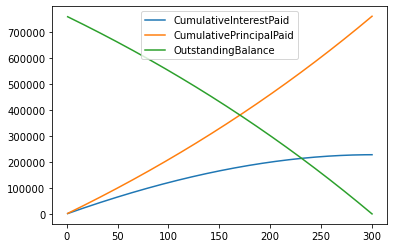

In [11]:
#plot
plt.plot(Df['PmtNo'], Df['TotIntPaid'], label='CumulativeInterestPaid')
plt.plot(Df['PmtNo'], Df['TotPrincipalPaid'], label='CumulativePrincipalPaid')
plt.plot(Df['PmtNo'], Df['OutstandingBal'], label='OutstandingBalance')
plt.legend()
plt.show()

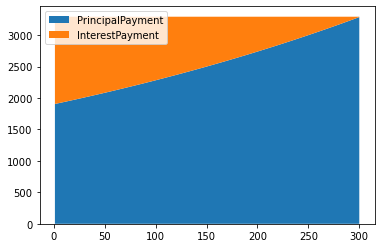

In [12]:
plt.stackplot(Df['PmtNo'], Df['PrincipalPmt'], Df['IntPmt'], labels=['PrincipalPayment','InterestPayment'])
plt.legend(loc='upper left')
plt.show()